# Import libraries

In [1]:
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import importlib.util
import sys

In [2]:
from scripts.parse_vars import parse_variables

In [3]:
path_vars = f"../../geno_simulation.txt"
R_directory = f"../../rstudio_geno_simulation"
R_file = f"create_geno.R"

variables = parse_variables(path_vars)
if 'G' not in globals():
    G = int(variables['G'])
if 'L' not in globals():
    L = int(variables['L'])
if 'c' not in globals():
    c = int(variables['c'])
if 'k' not in globals():
    k = int(variables['k'])
if 'M' not in globals():
    M = float(variables['M'])
if 'HWE' not in globals():
    HWE = int(variables['HWE'])

if 'tools' not in globals():
    tools = ['PCA', 'abyss_counted', 'abyss', 'no_corr']


if 'scenarios' not in globals():
    scenarios = ['snp_effect',
                 'linear_continuous',
                 'non_linear_continuous',
                 'discrete_global',
                 'discrete_localized',
                 'mix_linear_continuous',
                 'mix_non_linear_continuous',
                 'mix_discrete_global',
                 'mix_discrete_localized']

if 'very_rare_threshold_L' not in globals():
    very_rare_threshold_L = float(variables['very_rare_threshold_L'])
if 'very_rare_threshold_H' not in globals():
    very_rare_threshold_H = float(variables['very_rare_threshold_H'])
if 'rare_threshold_L' not in globals():
    rare_threshold_L = float(variables['rare_threshold_L'])
if 'rare_threshold_H' not in globals():
    rare_threshold_H = float(variables['rare_threshold_H'])
if 'common_threshold_L' not in globals():
    common_threshold_L = float(variables['common_threshold_L'])
if 'common_threshold_H' not in globals():
    common_threshold_H = float(variables['common_threshold_H'])
if 'F' not in globals():
    F = float(variables['F'])
commands = [
    f"G <- {G}",
    f"L <- {L}",
    f"c <- {c}",
    f"k <- {k}",
    f"M <- {M}",
    f'setwd("{R_directory}")',
    f'source("{R_file}", echo=TRUE)'
]


# Concatenate commands into a single string
r_script = ";".join(commands)

# Run the R script
result = subprocess.run(['Rscript', '-e', r_script], capture_output=True, text=True)


In [6]:
path_geno = f"simulation_data/G{G}_L{L}_c{c}_k{k}_M{M}_mixed_01_all_outbred/genotype"
geno = pd.read_pickle((f"{path_geno}/complete.pkl"))

In [7]:
geno

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,VR_7991,VR_7992,VR_7993,VR_7994,VR_7995,VR_7996,VR_7997,VR_7998,VR_7999,VR_8000
0,1,1,1,-1,1,0,-1,1,-1,1,...,1,1,1,1,1,0,1,1,1,1
1,1,1,1,-1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,-1,1,1,-1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,-1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,-1,1,0,-1,1,-1,1,...,0,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1,1,-1,1,1,1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1
1996,-1,1,-1,1,1,0,1,-1,-1,1,...,1,1,1,1,1,0,1,1,1,1
1997,0,1,-1,1,1,1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1
1998,-1,1,-1,1,1,1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1


In [9]:
path_pheno = f"simulation_data/G{G}_L{L}_c{c}_k{k}_M{M}_F{F}/phenotype/"
pheno = pd.read_pickle(f"{path_pheno}/env_pheno.pkl")
humans = pd.read_pickle(f"{path_pheno}/humans.pkl")

In [10]:
pheno

,x,y,01_pheno_linear,02_pheno_sine_x,03_pheno_sine_y,04_pheno_sine_x_y,05_pheno_discrete
0,1,1,-1.0,0.856410,6.210526e-01,0.740260,0
1,1,1,-1.0,0.856410,6.210526e-01,0.740260,0
2,1,1,-1.0,0.856410,6.210526e-01,0.740260,0
3,1,1,-1.0,0.856410,6.210526e-01,0.740260,0
4,1,1,-1.0,0.856410,6.210526e-01,0.740260,0
...,...,...,...,...,...,...,...
1995,10,10,1.0,0.025641,-1.110223e-16,0.012987,0
1996,10,10,1.0,0.025641,-1.110223e-16,0.012987,0
1997,10,10,1.0,0.025641,-1.110223e-16,0.012987,0
1998,10,10,1.0,0.025641,-1.110223e-16,0.012987,0


# Gwas

In [11]:
env_factor = "01_pheno_linear"

In [12]:
from statsmodels.api import OLS, add_constant
from scipy.stats import linregress

# Load or assign your genotype and phenotype data
# geno: DataFrame with SNPs in columns, individuals in rows
# pheno: DataFrame with phenotype, including '04_pheno_sine_x_y'

# Extract phenotype
y = pheno[env_factor].values

# Initialize list for results
results = []

# Loop over each SNP
for snp in geno.columns:
    x = geno[snp].values
    # Add constant for intercept
    X = add_constant(x)
    model = OLS(y, X).fit()
    pval = model.pvalues[1]  # p-value of SNP term
    logp = -np.log10(pval)
    results.append((snp, logp))

# Create DataFrame of results
gwas_results = pd.DataFrame(results, columns=['SNP', '-log10(p)'])

# Sort results by -log10(p)
gwas_results = gwas_results.sort_values('-log10(p)', ascending=False).reset_index(drop=True)

# Display
gwas_results

/tmp/ipykernel_9742/1191010108.py:21: RuntimeWarning: divide by zero encountered in log10
  logp = -np.log10(pval)
/tmp/ipykernel_9742/1191010108.py:21: RuntimeWarning: divide by zero encountered in log10
  logp = -np.log10(pval)
/tmp/ipykernel_9742/1191010108.py:21: RuntimeWarning: divide by zero encountered in log10
  logp = -np.log10(pval)
/tmp/ipykernel_9742/1191010108.py:21: RuntimeWarning: divide by zero encountered in log10
  logp = -np.log10(pval)
/tmp/ipykernel_9742/1191010108.py:21: RuntimeWarning: divide by zero encountered in log10
  logp = -np.log10(pval)
/tmp/ipykernel_9742/1191010108.py:21: RuntimeWarning: divide by zero encountered in log10
  logp = -np.log10(pval)
/tmp/ipykernel_9742/1191010108.py:21: RuntimeWarning: divide by zero encountered in log10
  logp = -np.log10(pval)
/tmp/ipykernel_9742/1191010108.py:21: RuntimeWarning: divide by zero encountered in log10
  logp = -np.log10(pval)
/tmp/ipykernel_9742/1191010108.py:21: RuntimeWarning: divide by zero encountered

,SNP,-log10(p)
0,C_1,inf
1,C_120,inf
2,C_55,inf
3,C_66,inf
4,C_51,inf
...,...,...
7995,R_7091,7.232456e-15
7996,R_5510,7.087807e-15
7997,R_5283,6.846725e-15
7998,R_3758,5.496667e-15


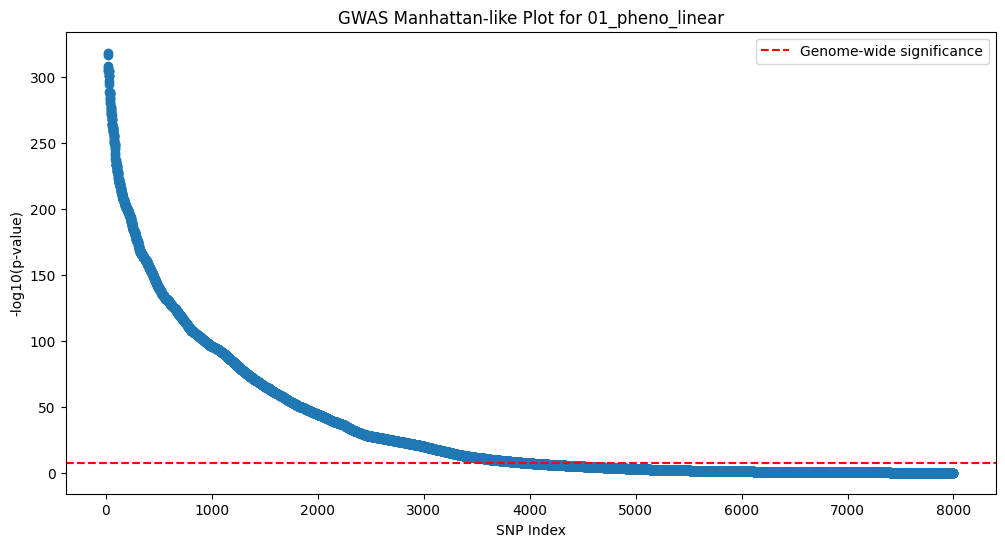

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(gwas_results['-log10(p)'].values, marker='o', linestyle='none')
plt.axhline(-np.log10(5e-8), color='red', linestyle='--', label='Genome-wide significance')
plt.xlabel('SNP Index')
plt.ylabel('-log10(p-value)')
plt.title(f'GWAS Manhattan-like Plot for {env_factor}')
plt.legend()
plt.show()

In [14]:
highest_snp = gwas_results.values[0][0]
geno[[highest_snp]]

,C_1
0,1
1,1
2,1
3,1
4,1
...,...
1995,-1
1996,-1
1997,0
1998,-1


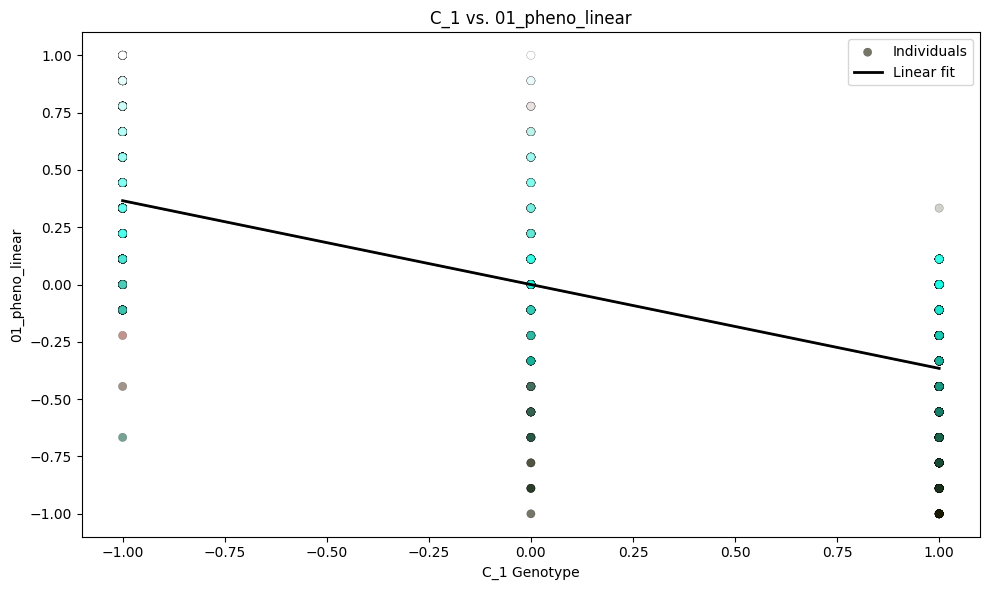

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Assume you have:
# geno, pheno, labels (with 'x', 'y', 'populations')
# highest_snp is already defined

# Merge all into one DataFrame for plotting
merged = pheno.copy()
merged['genotype'] = geno[highest_snp].values
merged['populations'] = humans['populations'].values
merged['x'] = humans['x'].values
merged['y'] = humans['y'].values
merged['z'] = humans['populations']  # z = population ID for color mapping

# Define your color mapping function
def map_to_color(x, y, z, df):
    r = x / df['x'].max() if df['x'].max() != 0 else 0
    g = y / df['y'].max() if df['y'].max() != 0 else 0
    b = z / df['z'].max() if df['z'].max() != 0 else 0
    return (r, g, b)

# Apply function to each row to get RGB color
colors = merged.apply(lambda row: map_to_color(row['x'], row['y'], row['z'], merged), axis=1)

# Fit regression
X = sm.add_constant(merged['genotype'].values)
y = merged[env_factor].values
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(merged['genotype'], y, color=colors, alpha=0.6, edgecolor='k', linewidth=0.2, label='Individuals')
sns.lineplot(x=merged['genotype'], y=y_pred, color='black', lw=2, label='Linear fit')
plt.xlabel(f'{highest_snp} Genotype')
plt.ylabel(env_factor)
plt.title(f'{highest_snp} vs. {env_factor}')
plt.legend()
plt.tight_layout()
plt.show()


# Find AFs per pop

In [16]:
merged

,x,y,01_pheno_linear,02_pheno_sine_x,03_pheno_sine_y,04_pheno_sine_x_y,05_pheno_discrete,genotype,populations,z
0,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1
1,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1
2,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1
3,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1
4,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1995,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,-1,100,100
1996,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,-1,100,100
1997,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,0,100,100
1998,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,-1,100,100


In [17]:
dfs = []

for unique_pop in merged['populations'].unique():
    # Make an explicit copy of the slice
    pop = merged[merged['populations'] == unique_pop].copy()
    
    # Count each genotype globally (normalized = ratio)
    geno_counts = pop['genotype'].value_counts(normalize=True).sort_index()

    # Extract ratios with default = 0 if not present
    minaf_ratio = geno_counts.get(-1, 0)
    hetaf_ratio = geno_counts.get(0, 0)
    majaf_ratio = geno_counts.get(1, 0)
    
    # Safely assign columns
    pop['q2'] = minaf_ratio
    pop['2pq'] = hetaf_ratio
    pop['p2'] = majaf_ratio
    pop['p-q'] =  majaf_ratio-minaf_ratio
    dfs.append(pop)

# Concatenate all the population slices back into a full DataFrame
populations_with_ratios = pd.concat(dfs, ignore_index=True)


In [18]:
populations_with_ratios

,x,y,01_pheno_linear,02_pheno_sine_x,03_pheno_sine_y,04_pheno_sine_x_y,05_pheno_discrete,genotype,populations,z,q2,2pq,p2,p-q
0,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1,0.00,0.05,0.95,0.95
1,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1,0.00,0.05,0.95,0.95
2,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1,0.00,0.05,0.95,0.95
3,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1,0.00,0.05,0.95,0.95
4,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1,0.00,0.05,0.95,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,-1,100,100,0.95,0.05,0.00,-0.95
1996,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,-1,100,100,0.95,0.05,0.00,-0.95
1997,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,0,100,100,0.95,0.05,0.00,-0.95
1998,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,-1,100,100,0.95,0.05,0.00,-0.95


In [19]:
populations_with_ratios['geno_corrected'] = populations_with_ratios['genotype'] - populations_with_ratios['p-q']

In [20]:
df = populations_with_ratios.copy()

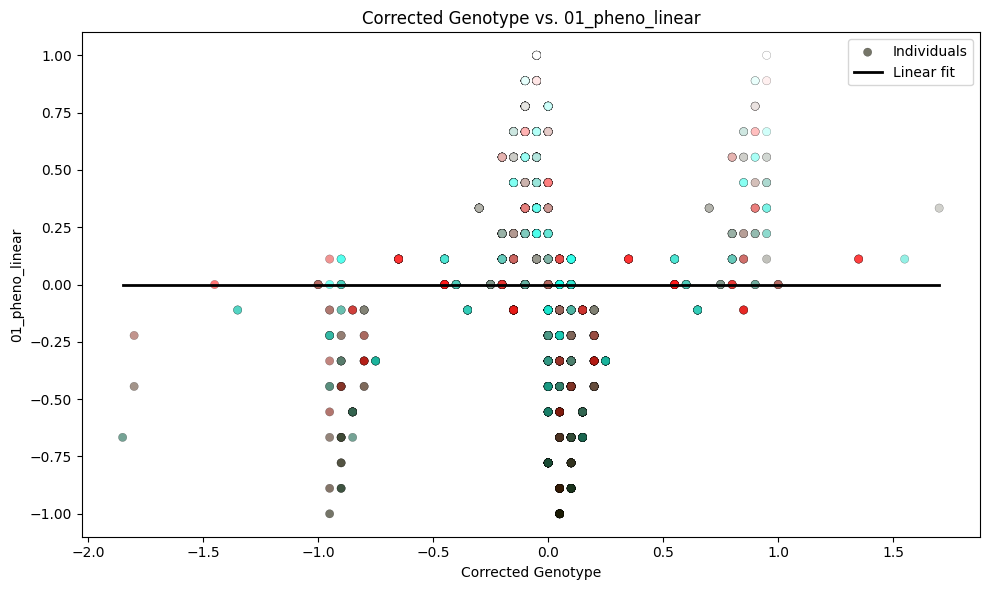

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Assume df is your full DataFrame that already includes:
# x, y, 04_pheno_sine_x_y, geno_corrected, populations, etc.
# We'll call it `df` here to distinguish from previous merged versions

# Define your color mapping function (same as before)
def map_to_color(x, y, z, df):
    r = x / df['x'].max() if df['x'].max() != 0 else 0
    g = y / df['y'].max() if df['y'].max() != 0 else 0
    b = z / df['z'].max() if df['z'].max() != 0 else 0
    return (r, g, b)

# Compute colors based on x, y, populations (as z)
colors = df.apply(lambda row: map_to_color(row['x'], row['y'], row['populations'], df), axis=1)

# Fit regression using geno_corrected
X = sm.add_constant(df['geno_corrected'].values)
y = df[env_factor].values
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['geno_corrected'], y, color=colors, alpha=0.6, edgecolor='k', linewidth=0.2, label='Individuals')
sns.lineplot(x=df['geno_corrected'], y=y_pred, color='black', lw=2, label='Linear fit')
plt.xlabel('Corrected Genotype')
plt.ylabel(env_factor)
plt.title(f'Corrected Genotype vs. {env_factor}')
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
np.round(y_pred)

array([-0., -0., -0., ..., -0., -0., -0.])

In [22]:
df['pheno_eval'] = y - y_pred

In [23]:
df

,x,y,01_pheno_linear,02_pheno_sine_x,03_pheno_sine_y,04_pheno_sine_x_y,05_pheno_discrete,genotype,populations,z,q2,2pq,p2,p-q,geno_corrected,pheno_eval
0,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1,0.00,0.05,0.95,0.95,0.05,-1.0
1,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1,0.00,0.05,0.95,0.95,0.05,-1.0
2,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1,0.00,0.05,0.95,0.95,0.05,-1.0
3,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1,0.00,0.05,0.95,0.95,0.05,-1.0
4,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,1,1,1,0.00,0.05,0.95,0.95,0.05,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,-1,100,100,0.95,0.05,0.00,-0.95,-0.05,1.0
1996,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,-1,100,100,0.95,0.05,0.00,-0.95,-0.05,1.0
1997,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,0,100,100,0.95,0.05,0.00,-0.95,0.95,1.0
1998,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,-1,100,100,0.95,0.05,0.00,-0.95,-0.05,1.0


In [24]:
# Plot evaluated phenotype

In [25]:
pheno['pheno_eval'] = y - y_pred

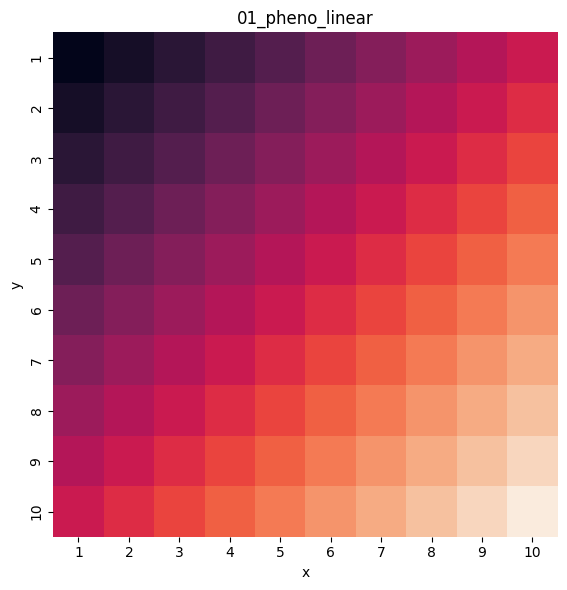

In [26]:
# Aggregate to ensure one value per (x, y)
pheno_agg = pheno.groupby(['y', 'x'])[env_factor].mean().reset_index()

# Pivot to wide format
pivoted = pheno_agg.pivot(index='y', columns='x', values=env_factor)

plt.figure(figsize=(6, 6))
sns.heatmap(
    pivoted,
    cmap='rocket',
    square=True,
    cbar=False  # <- disables the colorbar
)
plt.title(env_factor)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

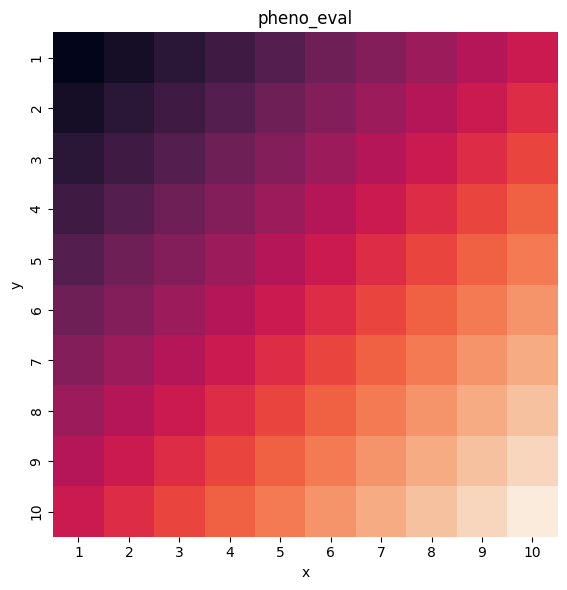

In [27]:
# Aggregate to ensure one value per (x, y)
pheno_agg = pheno.groupby(['y', 'x'])['pheno_eval'].mean().reset_index()

# Pivot to wide format
pivoted = pheno_agg.pivot(index='y', columns='x', values='pheno_eval')

plt.figure(figsize=(6, 6))
sns.heatmap(
    pivoted,
    cmap='rocket',
    square=True,
    cbar=False  # <- disables the colorbar
)
plt.title('pheno_eval')
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

# Linear PCA

In [28]:
geno

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,VR_7991,VR_7992,VR_7993,VR_7994,VR_7995,VR_7996,VR_7997,VR_7998,VR_7999,VR_8000
0,1,1,1,-1,1,0,-1,1,-1,1,...,1,1,1,1,1,0,1,1,1,1
1,1,1,1,-1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,-1,1,1,-1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,-1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,-1,1,0,-1,1,-1,1,...,0,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1,1,-1,1,1,1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1
1996,-1,1,-1,1,1,0,1,-1,-1,1,...,1,1,1,1,1,0,1,1,1,1
1997,0,1,-1,1,1,1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1
1998,-1,1,-1,1,1,1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load or assume you already have the geno DataFrame
# geno = pd.read_csv("your_file.csv")  # optional if already loaded

# Step 2: Standardize the data (PCA is sensitive to scale)
scaler = StandardScaler()
geno_std = scaler.fit_transform(geno)

# Step 3: Run PCA
pca = PCA(n_components=1)
geno_pca = pca.fit_transform(geno_std)

# Step 4: Reconstruct the genotype matrix from the 5 PCs
geno_recon_std = pca.inverse_transform(geno_pca)

# Step 5: Unstandardize to original scale
geno_recon = scaler.inverse_transform(geno_recon_std)

# Step 6: Create a DataFrame with original column names
geno_recon_df = pd.DataFrame(geno_recon, columns=geno.columns)

# Step 7: (Optional) Round or clip values if needed
# If you want the data to resemble original genotypes (-1, 0, 1)
# geno_recon_df = geno_recon_df.round().clip(-1, 1)

# Done: geno_recon_df is your reconstructed dataframe from top 5 PCs


In [30]:
geno_recon_df

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,VR_7991,VR_7992,VR_7993,VR_7994,VR_7995,VR_7996,VR_7997,VR_7998,VR_7999,VR_8000
0,0.826871,0.688159,0.711627,-0.816727,0.689225,0.705587,-0.255899,0.913278,-0.330399,-0.450071,...,0.912384,0.895812,0.902616,0.929277,0.924933,0.913914,0.901538,0.923589,0.927937,0.924856
1,0.807961,0.672433,0.695376,-0.798025,0.673497,0.689485,-0.250013,0.892437,-0.322785,-0.439721,...,0.912421,0.896239,0.902899,0.928962,0.924717,0.913962,0.901880,0.923518,0.927767,0.924860
2,0.814141,0.677573,0.700687,-0.804137,0.678637,0.694748,-0.251936,0.899248,-0.325274,-0.443104,...,0.912409,0.896099,0.902807,0.929065,0.924788,0.913946,0.901768,0.923541,0.927823,0.924859
3,0.826324,0.687705,0.711158,-0.816186,0.688770,0.705122,-0.255729,0.912675,-0.330179,-0.449772,...,0.912385,0.895824,0.902624,0.929268,0.924927,0.913916,0.901548,0.923587,0.927932,0.924856
4,0.836063,0.695804,0.719528,-0.825817,0.696870,0.713414,-0.258761,0.923408,-0.334100,-0.455102,...,0.912366,0.895604,0.902478,0.929430,0.925038,0.913891,0.901372,0.923623,0.928020,0.924855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.681753,-0.566473,-0.584910,0.675213,-0.565527,-0.579018,0.213725,-0.749345,0.276974,0.375643,...,0.915333,0.929909,0.925211,0.904141,0.907722,0.917720,0.928836,0.917953,0.914368,0.925118
1996,-0.673413,-0.559537,-0.577743,0.666965,-0.558591,-0.571916,0.211129,-0.740154,0.273616,0.371079,...,0.915316,0.929720,0.925086,0.904280,0.907818,0.917699,0.928685,0.917984,0.914443,0.925117
1997,-0.684604,-0.568845,-0.587361,0.678033,-0.567899,-0.581446,0.214613,-0.752488,0.278122,0.377204,...,0.915338,0.929973,0.925253,0.904093,0.907690,0.917727,0.928888,0.917942,0.914342,0.925119
1998,-0.678941,-0.564135,-0.582494,0.672433,-0.563189,-0.576624,0.212850,-0.746247,0.275842,0.374105,...,0.915327,0.929845,0.925168,0.904188,0.907755,0.917713,0.928785,0.917964,0.914393,0.925118


In [31]:
env_factor = "05_pheno_discrete"
pheno 

,x,y,01_pheno_linear,02_pheno_sine_x,03_pheno_sine_y,04_pheno_sine_x_y,05_pheno_discrete,pheno_eval
0,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,-1.0
1,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,-1.0
2,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,-1.0
3,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,-1.0
4,1,1,-1.0,0.856410,6.210526e-01,0.740260,0,-1.0
...,...,...,...,...,...,...,...,...
1995,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,1.0
1996,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,1.0
1997,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,1.0
1998,10,10,1.0,0.025641,-1.110223e-16,0.012987,0,1.0


In [32]:
from statsmodels.api import OLS, add_constant
import numpy as np

# Extract phenotype
y = pheno[env_factor].values

# Initialize list for results
results = []
diff_pheno = []

for snp in geno_recon_df.columns:
    x = geno[snp].values - geno_recon_df[snp].values
    X = add_constant(x)
    model = OLS(y, X).fit()
    
    pval = model.pvalues[1]
    logp = -np.log10(pval)
    results.append((snp, logp))
    
    residuals = y - model.fittedvalues
    diff_pheno.append(residuals)

# Convert to 2D array and compute mean across SNPs
diff_pheno_array = np.column_stack(diff_pheno)  # shape: (n_samples, n_snps)
mean_diff_pheno = np.mean(diff_pheno_array, axis=1)  # shape: (n_samples,)


In [35]:
pheno['pheno_PCA'] = mean_diff_pheno + np.random.normal(loc=0, scale=0.2, size=mean_diff_pheno.shape)

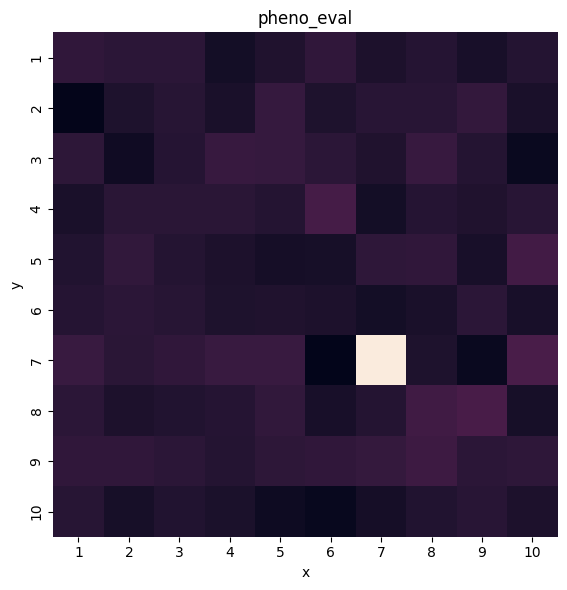

In [36]:
# Aggregate to ensure one value per (x, y)
pheno_agg = pheno.groupby(['y', 'x'])['pheno_PCA'].mean().reset_index()

# Pivot to wide format
pivoted = pheno_agg.pivot(index='y', columns='x', values='pheno_PCA')

plt.figure(figsize=(6, 6))
sns.heatmap(
    pivoted,
    cmap='rocket',
    square=True,
    cbar=False  # <- disables the colorbar
)
plt.title('pheno_eval')
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()